In [49]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "C:/Users/David/Desktop/GTATL201908DATA3/02 - Homework/05-Matplotlib/Instructions/Pymaceuticals/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "C:/Users/David/Desktop/GTATL201908DATA3/02 - Homework/05-Matplotlib/Instructions/Pymaceuticals/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
drug_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_data, drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [116]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and make DataFrame
mean_tumor_volume = pd.DataFrame(data_complete.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
#make it look pretty with reset_index
mean_tumor_volume.reset_index(inplace = True)
#Preview Data Frame
#mean_tumor_volume

In [113]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_flip = mean_tumor_volume.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
mean_tumor_volume_flip.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


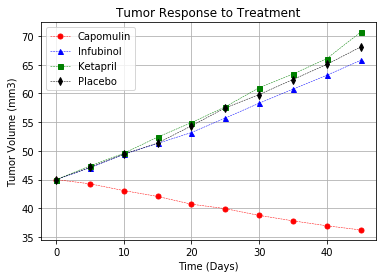

In [160]:
Capomulin = plt.errorbar(mean_tumor_volume_flip.index, mean_tumor_volume_flip['Capomulin'], 
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = "Capomulin")

Infubinol = plt.errorbar(mean_tumor_volume_flip.index, mean_tumor_volume_flip['Infubinol'], 
             color='blue', marker='^', markersize=5, linestyle='--', linewidth=0.5, label = "Infubinol")

Ketapril = plt.errorbar(mean_tumor_volume_flip.index, mean_tumor_volume_flip['Ketapril'], 
             color='green', marker='s', markersize=5, linestyle='--', linewidth=0.5, label = "Ketapril")

Placebo = plt.errorbar(mean_tumor_volume_flip.index, mean_tumor_volume_flip['Placebo'], 
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label = "Placebo")

# Chart title
plt.title('Tumor Response to Treatment')
# x label
plt.xlabel('Time (Days)')
# y label
plt.ylabel('Tumor Volume (mm3)')
# legend 
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [97]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint and make Data Frame
mean_met = pd.DataFrame(data_complete.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())
#make it look pretty with reset_index
mean_met.reset_index(inplace = True)
# Preview DataFrame
#mean_met

In [99]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint and make Data Frame
met_sem = pd.DataFrame(data_complete.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem())
#Index
met_sem.reset_index(inplace = True)
#met_sem

In [102]:
# Minor Data Munging to Re-Format the Data Frames
met_sem_flip = met_sem.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
met_sem_flip.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


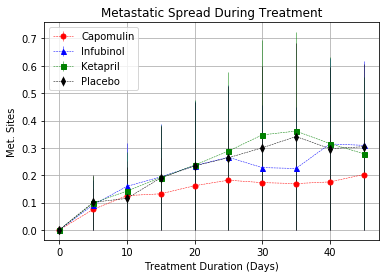

In [157]:
Capomulin = plt.errorbar(met_sem_flip.index, met_sem_flip['Capomulin'], yerr=met_sem_flip['Capomulin'],
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = "Capomulin")

Infubinol = plt.errorbar(met_sem_flip.index, met_sem_flip['Infubinol'], yerr=met_sem_flip['Infubinol'],
             color='blue', marker='^', markersize=5, linestyle='--', linewidth=0.5, label = "Infubinol")

Ketapril = plt.errorbar(met_sem_flip.index, met_sem_flip['Ketapril'], yerr=met_sem_flip['Ketapril'],
             color='green', marker='s', markersize=5, linestyle='--', linewidth=0.5, label = "Ketapril")

Placebo = plt.errorbar(met_sem_flip.index, met_sem_flip['Placebo'], yerr=met_sem_flip['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label = "Placebo")

# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Met. Sites")
# legend 
plt.legend( loc='upper left')
plt.grid()
plt.show()

In [120]:
#Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric) and make Data Frame
mice = pd.DataFrame(data_complete.groupby(['Drug', 'Timepoint'])['Mouse ID'].count())
mice.reset_index(inplace = True)
#mice

In [121]:
# Minor Data Munging to Re-Format the Data Frames
mice_flip = mice.pivot_table(index='Timepoint',columns='Drug',values='Mouse ID')  
mice_flip.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


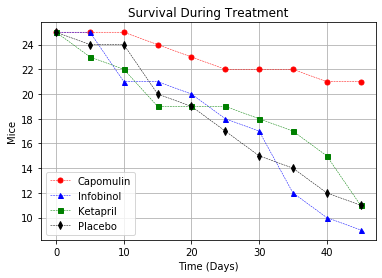

In [165]:
# The starter example does not show error bars for this graph
Capomulin = plt.errorbar(mice_flip.index, mice_flip['Capomulin'], 
             color='red', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = "Capomulin")

Infobinol = plt.errorbar(mice_flip.index, mice_flip['Infubinol'], 
             color='blue', marker='^', markersize=5, linestyle='--', linewidth=0.5, label = "Infobinol")

Ketapril = plt.errorbar(mice_flip.index, mice_flip['Ketapril'], 
             color='green', marker='s', markersize=5, linestyle='--', linewidth=0.5, label = "Ketapril")

Placebo = plt.errorbar(mice_flip.index, mice_flip['Placebo'], 
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label = "Placebo")

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Time (Days)")
# y label, can't compute percentage
plt.ylabel("Mice")
# legend 
plt.legend(loc='bottom left')
plt.grid()
plt.show()

In [127]:
# Calculate the percent changes for each drug, last durg[-1] minus first drug [0]
drug_change =  ((mean_tumor_volume_flip.iloc[-1]-mean_tumor_volume_flip.iloc[0])/mean_tumor_volume_flip.iloc[0]) * 100
# Display the data to confirm
drug_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Text(0, 0.5, '% Tumor Volume Change')

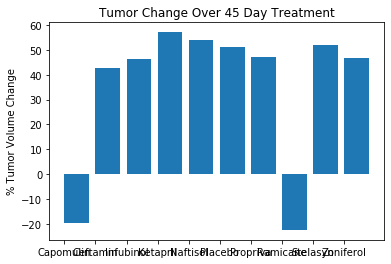

In [166]:
# Store all Relevant Percent Changes into a Tuple
drugs = drug_change.index
drugs
percent = drug_change.values
# Splice the data between passing and failing drugs
# Use a for loop to make red or green
x_axis = np.arange(len(drugs))
x_axis
ticks = [value for value in x_axis]
plt.xticks(ticks, drug_change.index)
plt.bar(x_axis, percent, align="edge")
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")